## Intro

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib
%matplotlib inline
import bs4 as bs # beautifulsoup4
import sklearn
import numpy

import fix_yahoo_finance as fyf
import datetime

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web

In [3]:
import quandl

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)

In [68]:
# start = dt.datetime(2000, 1, 1)
# end = dt.datetime(2016, 12, 31)

In [69]:
# df = web.DataReader('TSLA', 'morningstar', start, end)
# yahoo and google do not work anymore
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-google

In [70]:
# df.head()

In [71]:
# df.tail()

In [10]:
start = datetime.datetime(2009,1,1)
end = datetime.datetime(2011,12,31)
currency = quandl.get('CUR/XUDLBK85', start=start, end=end)

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

In [4]:
stocks = ['AAPL', 'NBIX', 'CLDR', 'MTSC']
start = datetime.datetime(2016,10,1)
end = datetime.datetime(2018,10,1)
df = fyf.download(stocks, start=start, end=end)

[*********************100%***********************]  4 of 4 downloaded


ValueError: zero-size array to reduction operation maximum which has no identity

In [5]:
df.head()

NameError: name 'df' is not defined

In [74]:
prices = df['Adj Close'].dropna()
prices.head()

,AAPL,CLDR,MTSC,NBIX
Date,,,,
2017-04-28,140.377380,18.100000,44.908978,53.400002
2017-05-01,143.240646,18.190001,45.005661,54.650002
2017-05-02,144.149475,18.389999,44.473907,53.830002
2017-05-03,143.709702,20.120001,44.425571,53.570000
2017-05-04,143.191772,19.580000,44.570587,53.630001


In [75]:
prices['CHMF.ME'] = prices['MTSC']/60 # in dollars

In [76]:
prices['Stock Portfolio Price'] = prices[stocks].mean(axis=1)
prices.head()

,AAPL,CLDR,MTSC,NBIX,CHMF.ME,Stock Portfolio Price
Date,,,,,,
2017-04-28,140.377380,18.100000,44.908978,53.400002,0.748483,64.196590
2017-05-01,143.240646,18.190001,45.005661,54.650002,0.750094,65.271577
2017-05-02,144.149475,18.389999,44.473907,53.830002,0.741232,65.210846
2017-05-03,143.709702,20.120001,44.425571,53.570000,0.740426,65.456318
2017-05-04,143.191772,19.580000,44.570587,53.630001,0.742843,65.243090


In [77]:
prices.tail()

,AAPL,CLDR,MTSC,NBIX,CHMF.ME,Stock Portfolio Price
Date,,,,,,
2018-09-24,220.789993,17.43,54.849998,121.050003,0.914167,103.529999
2018-09-25,222.190002,17.84,54.750000,122.639999,0.912500,104.355000
2018-09-26,220.419998,17.85,54.400002,121.540001,0.906667,103.552500
2018-09-27,224.949997,17.57,54.299999,120.480003,0.905000,104.325000
2018-09-28,225.740005,17.65,54.750000,122.949997,0.912500,105.272500


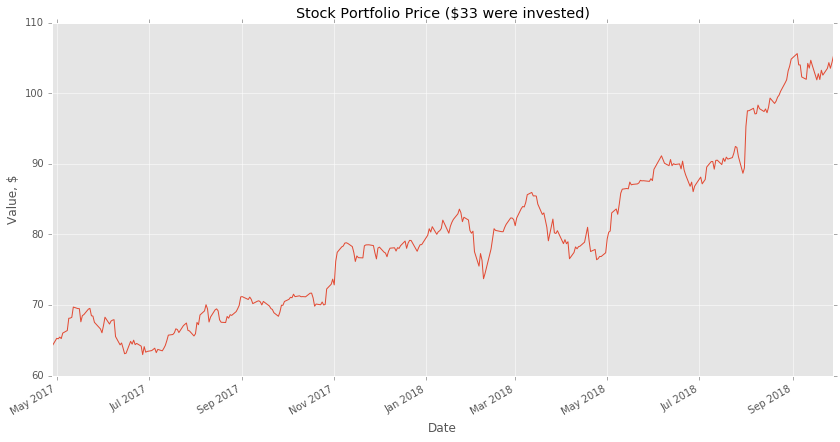

In [78]:
prices['Stock Portfolio Price'].plot()
plt.title('Stock Portfolio Price ($33 were invested)')
plt.ylabel('Value, $')

plt.savefig('conservative.png', bbox_inches = 'tight')

In [79]:
(prices['Stock Portfolio Price'][len(prices)-1] - prices['Stock Portfolio Price'][0])/3/prices['Stock Portfolio Price'][0]

0.2132818918678805

In [80]:
returns = (prices.shift(1) / prices - 1).dropna()

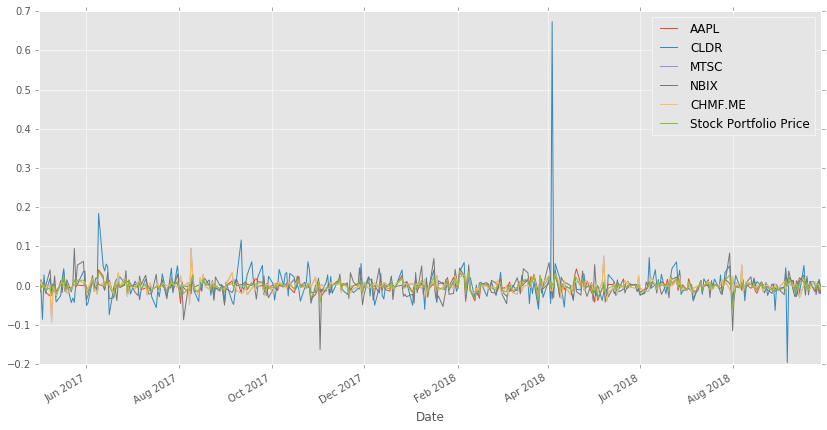

In [81]:
returns.plot()

In [82]:
returns['Stock Portfolio Return'] = returns[stocks].mean(axis=1)
returns.head()

,AAPL,CLDR,MTSC,NBIX,CHMF.ME,Stock Portfolio Price,Stock Portfolio Return
Date,,,,,,,
2017-05-01,-0.019989,-0.004948,-0.002148,-0.022873,-0.002148,-0.016469,-0.012490
2017-05-02,-0.006305,-0.010875,0.011957,0.015233,0.011957,0.000931,0.002502
2017-05-03,0.003060,-0.085984,0.001088,0.004854,0.001088,-0.003750,-0.019246
2017-05-04,0.003617,0.027579,-0.003254,-0.001119,-0.003254,0.003268,0.006706
2017-05-05,-0.016313,-0.019529,-0.005394,-0.002047,-0.005394,-0.011800,-0.010821


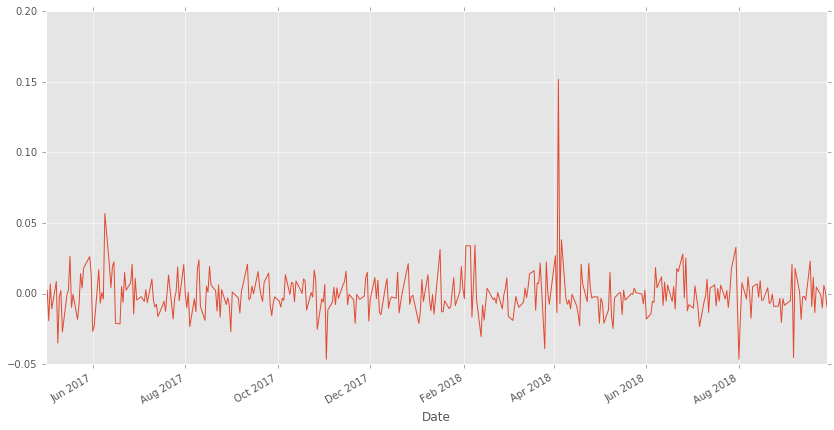

In [83]:
returns['Stock Portfolio Return'].plot()

In [84]:
returns['Stock Portfolio Return'].describe()

count    358.000000
mean      -0.000696
std        0.015615
min       -0.046552
25%       -0.008563
50%       -0.002447
75%        0.005999
max        0.151718
Name: Stock Portfolio Return, dtype: float64

## Handling Data and Graphing

In [85]:
# df.to_csv('tsla.csv')

In [86]:
df.head()

Open                                   High                  \
                  AAPL CLDR       MTSC       NBIX        AAPL CLDR       MTSC   
Date                                                                            
2016-09-30  112.459999  NaN  45.490002  50.490002  113.370003  NaN  46.320000   
2016-10-03  112.709999  NaN  46.000000  50.380001  113.050003  NaN  46.200001   
2016-10-04  113.059998  NaN  46.090000  50.459999  114.309998  NaN  46.459999   
2016-10-05  113.400002  NaN  45.470001  50.270000  113.660004  NaN  45.919998   
2016-10-06  113.699997  NaN  45.340000  50.770000  114.339996  NaN  45.599998   

                              Low        ...         Close             \
                 NBIX        AAPL CLDR   ...          MTSC       NBIX   
Date                                     ...                            
2016-09-30  51.759998  111.800003  NaN   ...     46.029999  50.639999   
2016-10-03  50.810001  112.279999  NaN   ...     46.029999  50.169998   
2016-10-04  50.880001  112.629997  NaN   ...     45.270000  50.270000   
2016-10-05  51.560001  112.690002  NaN   ...     45.490002  51.259998   
2016-10-06  50.889999  113.129997  NaN   ...     45.369999  47.570000   

             Adj Close                               Volume               \
                  AAPL CLDR       MTSC       NBIX      AAPL CLDR    MTSC   
Date                                                                       
2016-09-30  109.435753  NaN  44.020046  50.639999  36379100  NaN  124000   
2016-10-03  108.922684  NaN  44.020046  50.169998  21701800  NaN  149700   
2016-10-04  109.387352  NaN  43.293232  50.270000  29736800  NaN   84500   
2016-10-05  109.435753  NaN  43.503628  51.259998  21453100  NaN   93800   
2016-10-06  110.248878  NaN  43.388866  47.570000  28779300  NaN   54800   

                     
               NBIX  
Date                 
2016-09-30  1040600  
2016-10-03   502700  
2016-10-04   653500  
2016-10-05   599500  
2016-10-06  1379400  

[5 rows x 24 columns]

In [87]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=1)

In [88]:
df.head() # the same as an exported file

,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,TSLA,23.89,25.0000,17.54,19.00,18783276
2010-06-30,TSLA,23.83,30.4192,23.30,25.96,17194394
2010-07-01,TSLA,21.96,25.9200,20.27,25.00,8216789
2010-07-02,TSLA,19.20,23.1000,18.71,23.00,5135795
2010-07-05,TSLA,19.20,19.2000,19.20,19.20,0


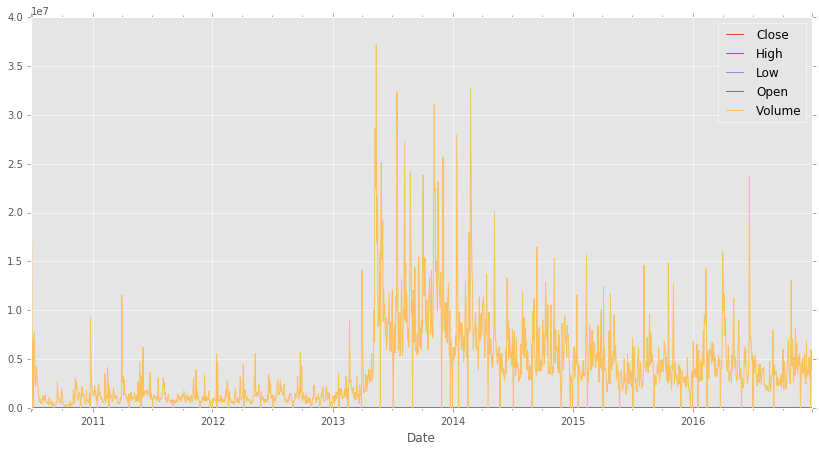

In [89]:
df.plot()

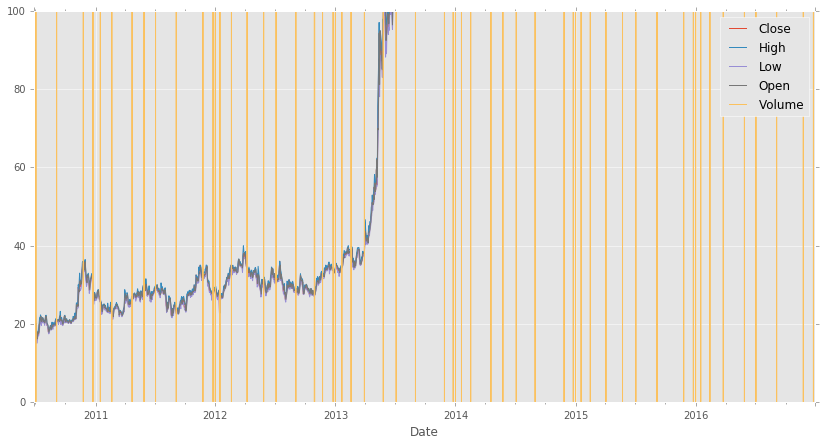

In [90]:
df.plot(ylim=(0, 100))

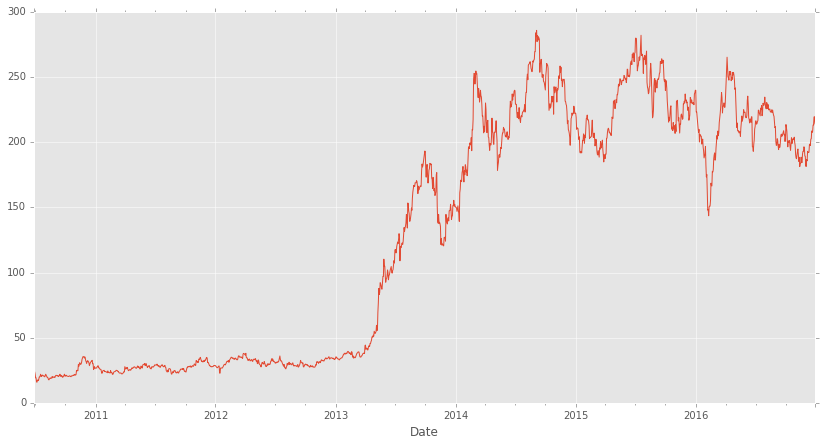

In [ ]:
df['Close'].plot()

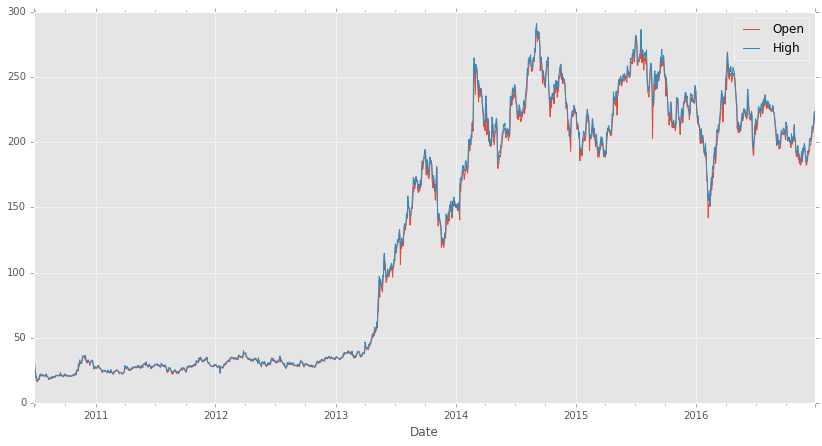

In [ ]:
df[['Open', 'High']].plot()

## Basic stock data manipulation

In [ ]:
df['100ma'] = df['Close'].rolling(window=100).mean() # 100 moving average

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.dropna(inplace=True) # modify df

In [ ]:
df.head()

In [ ]:
df['100ma_new'] = df['Close'].rolling(window=100, min_periods=0).mean() #100 ma_new = Close unless there are 100 obs

In [ ]:
df.head()

In [ ]:
ax1 = plt.subplot2grid((6, 1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5,0), rowspan=1, colspan=1, sharex=ax1)

In [ ]:
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma_new'])
ax2.bar(df.index, df['Volume'])
plt.show() # does not work!!!

## More stock manipulations

In [ ]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=1)

In [ ]:
df.head()

In [ ]:
df_ohlc = df['Close'].resample('10D').ohlc() # from 1 day to 10-day open, high, low, close

In [ ]:
df_ohlc.head()

In [ ]:
df_volume = df['Volume'].resample('10D').sum()

In [ ]:
df_ohlc.head()

In [ ]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [ ]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

In [ ]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [ ]:
df_ohlc.head()

In [ ]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between((df_volume.index).map(mdates.date2num), df_volume.values, 0)
plt.show() # why does not work???

## Automating getting the SP 500 list

In [1]:
import pickle
import requests
import lxml

In [10]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker =row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", 'wb') as f:
        pickle.dump(tickers, f)
    print(tickers)
    
    return tickers    

In [11]:
save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

## Getting all company pricing data in the SP 500

In [12]:
import os

In [18]:
def get_data_from_morningstar(reload_sp500=False, quantity=500):
    if reload_sp500: # is True
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", 'rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2016, 12, 31)
    for ticker in tickers[:quantity]:
        print(ticker)
        if not os.path.exists('stock_dfs/().csv'.format(ticker)):
            df = fyf.download(ticker, start, end)
            # df = web.DataReader(ticker, 'morningstar', start, end)
            df.to_csv('stock_dfs/().csv'.format(ticker)) # sth wrong
        else:
            print('Already have ()'.format(ticker)) # sth wrong

In [19]:
get_data_from_morningstar(quantity=5)

MMM
[*********************100%***********************]  1 of 1 downloaded
ABT
Already have ()
ABBV
Already have ()
ABMD
Already have ()
ACN
Already have ()
